In [18]:
import numpy as np
from Generator import LewisShedler
from numba import vectorize

# Lewis and Shedler, 1979

In [11]:
T = np.pi

In [58]:
@vectorize
def lam(t):
    if t < 1:
        return 100000
    else:
        return 10000000*(np.sin(t**2*np.pi)+1)/3

In [59]:
generator = LewisShedler(lam, T)

Maximum of the intensity function: 6666666.666666667


In [60]:
%%timeit 
t = generator.generate()

4.05 s ± 69.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
t = generator.generate()
print('Number of simulated points: {}'.format(len(t)))

Number of simulated points: 746945


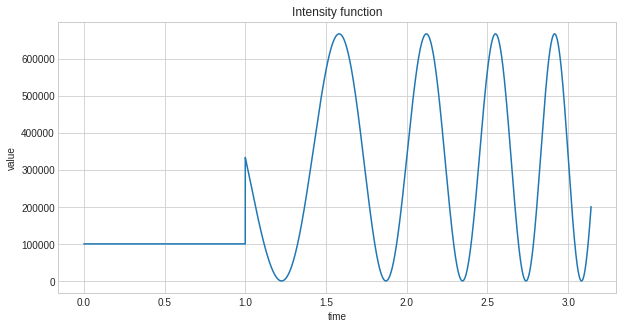

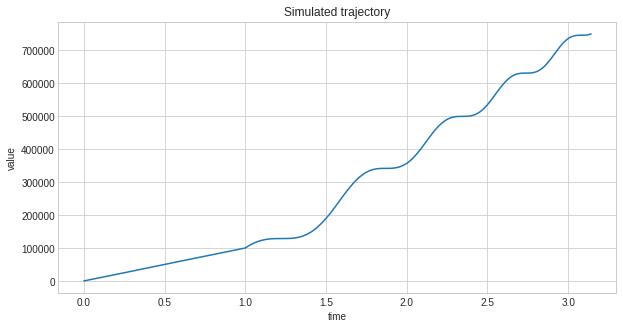

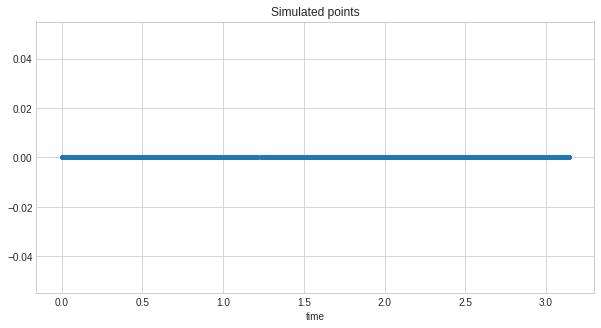

<Figure size 720x360 with 0 Axes>

In [57]:
generator.visualize(save=False)